In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import colormaps as cm

In [2]:
points = np.concatenate([np.array([[np.cos(i), np.sin(i)] for i in 2*np.pi*np.arange(6)/6 + np.pi/6]), 
                         [[1.9, 0], [-2.1, 0]]])

In [3]:
edges = np.concatenate([[(i, (i+1)%6) for i in range(6)], 
                        [(0, 6), (5, 6)], [(3, 7), (2, 7)]])

In [4]:
simplices_c = [[0, 5, 6]]
simplices_r = [[0, 5, 6], [2, 3, 7]]

In [5]:
r = 0.7

In [6]:
xmin = points[:, 0].min() - r
xmax = points[:, 0].max() + r
ymin = points[:, 1].min() - r
ymax = points[:, 1].max() + r

if False: # make square
    xwidth = xmax - xmin
    ywidth = ymax - ymin
    if xwidth > ywidth:
        add = 0.5*(xwidth - ywidth)
        ymax += add
        ymin -= add
    elif ywidth > xwidth:
        add = 0.5*(ywidth - xwidth)
        xmax += add
        xmin -= add


frame = np.array([[xmin, xmin, xmax, xmax, xmin], 
                  [ymin, ymax, ymax, ymin, ymin]])
frame_alpha = 0.0

In [7]:
figsize = (10, 6)

In [8]:
simplices = []
n = len(points)
for i in range(n):
    for j in range(i+1, n):
        for k in range(j+1, n):
            simplices.append((i, j, k))
colors = {tuple(simplices[i]) : cm['jet'](i/(len(simplices)-1)) for i in range(len(simplices))}

In [1]:
filename = 'LaTeX/pics/complex{0}.png'

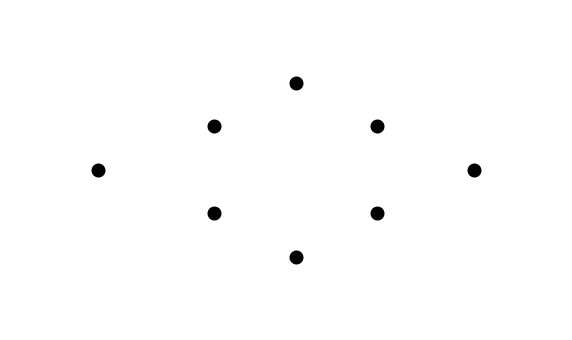

In [10]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.scatter(points[:,0], points[:,1], color='black', linewidth=8)
    
plt.plot(frame[0], frame[1], color='black', linewidth=1, linestyle=':', alpha=frame_alpha)
fig.savefig(filename.format('P'))

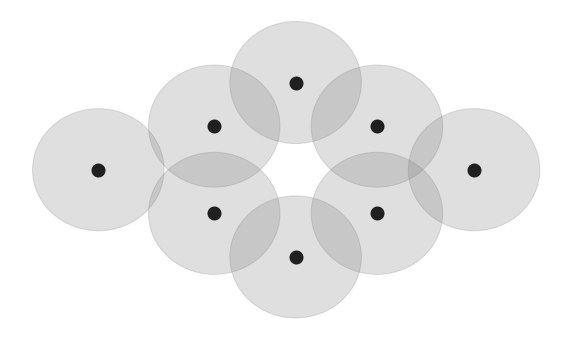

In [11]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.scatter(points[:,0], points[:,1], color='black', linewidth=8)
for point in points:
    circle = patches.Circle(point, radius=r, color='grey', alpha=0.25)
    ax.add_patch(circle)
    
plt.plot(frame[0], frame[1], color='black', linewidth=1, linestyle=':', alpha=frame_alpha)
fig.savefig(filename.format('U'))

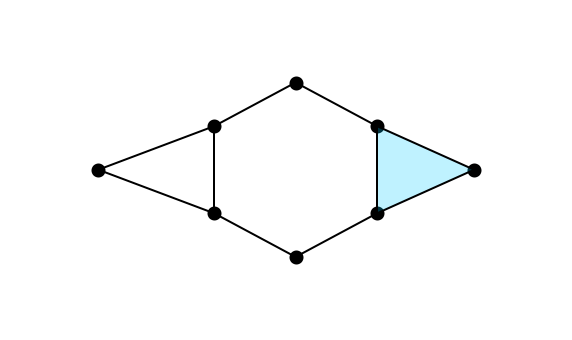

In [12]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

x, y = points.transpose()
plt.scatter(x, y, color='black', linewidth=8)
for edge in edges:
    plt.plot(x[edge], y[edge], color='black', linewidth=2)

for simplex in simplices_c:
    plt.fill(x[simplex], y[simplex], color=colors[tuple(simplex)], alpha=0.25)
    
plt.plot(frame[0], frame[1], color='black', linewidth=1, linestyle=':', alpha=frame_alpha)
fig.savefig(filename.format('C'))

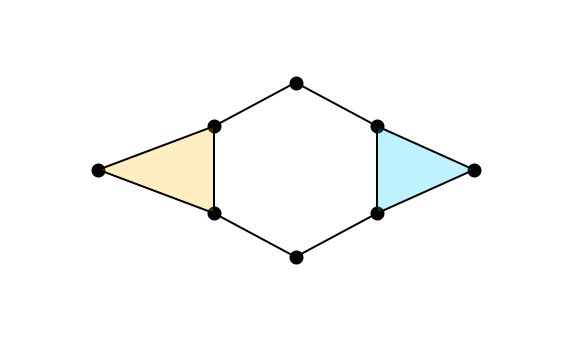

In [13]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

x, y = points.transpose()
plt.scatter(x, y, color='black', linewidth=8)
for edge in edges:
    plt.plot(x[edge], y[edge], color='black', linewidth=2)

for simplex in simplices_r:
    plt.fill(x[simplex], y[simplex], color=colors[tuple(simplex)], alpha=0.25)
    
plt.plot(frame[0], frame[1], color='black', linewidth=1, linestyle=':', alpha=frame_alpha)
fig.savefig(filename.format('R'))